### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None

### Loading data

In [8]:
df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [9]:
df.shape

(9800, 18)

### Checking info of data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [11]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


### Dropping irrelevant columns

In [12]:
df = df.drop(columns=['Row ID','Customer ID','Customer Name','Postal Code','Product ID','Product Name'])
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680


### Changing date_format of Order Date,Ship Date columns

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Mode'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9800 non-null   object        
 1   Order Date    9800 non-null   datetime64[ns]
 2   Ship Date     9800 non-null   object        
 3   Ship Mode     9800 non-null   datetime64[ns]
 4   Segment       9800 non-null   object        
 5   Country       9800 non-null   object        
 6   City          9800 non-null   object        
 7   State         9800 non-null   object        
 8   Region        9800 non-null   object        
 9   Category      9800 non-null   object        
 10  Sub-Category  9800 non-null   object        
 11  Sales         9800 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 918.9+ KB


In [14]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,CA-2017-152156,2017-11-08,11/11/2017,2017-11-11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96


### Segment_wise_category count

In [15]:
seg_df = df['Segment'].value_counts()
seg_df = seg_df.reset_index()
seg_df

,Segment,count
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


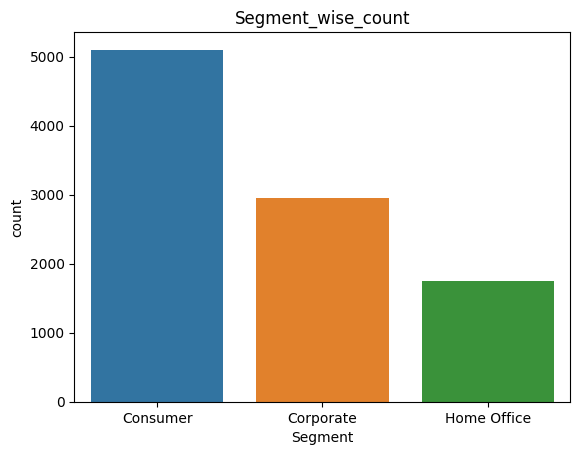

In [16]:
sns.barplot(data=seg_df,x='Segment',y='count')
plt.title('Segment_wise_count')
plt.show()

In [17]:
seg1_df = df.groupby(['Segment','Category']).agg(
    total_sale = ('Sales','sum')
)
seg1_df = seg1_df.reset_index()
seg1_df['Rounded_Total_sale'] = seg1_df['total_sale'].round(1)
seg1_df

,Segment,Category,total_sale,Rounded_Total_sale
0,Consumer,Furniture,387696.2580,387696.3
1,Consumer,Office Supplies,359352.6080,359352.6
2,Consumer,Technology,401011.6650,401011.7
3,Corporate,Furniture,220321.7018,220321.7
4,Corporate,Office Supplies,224130.5360,224130.5
5,Corporate,Technology,244041.8370,244041.8
6,Home Office,Furniture,120640.6159,120640.6
7,Home Office,Office Supplies,121939.1900,121939.2
8,Home Office,Technology,182402.3710,182402.4


### craeting new column 'Segment_category'

In [18]:
seg1_df['Segment_category'] = seg1_df['Segment'] + ' ' + seg1_df['Category']
seg1_df

,Segment,Category,total_sale,Rounded_Total_sale,Segment_category
0,Consumer,Furniture,387696.2580,387696.3,Consumer Furniture
1,Consumer,Office Supplies,359352.6080,359352.6,Consumer Office Supplies
2,Consumer,Technology,401011.6650,401011.7,Consumer Technology
3,Corporate,Furniture,220321.7018,220321.7,Corporate Furniture
4,Corporate,Office Supplies,224130.5360,224130.5,Corporate Office Supplies
5,Corporate,Technology,244041.8370,244041.8,Corporate Technology
6,Home Office,Furniture,120640.6159,120640.6,Home Office Furniture
7,Home Office,Office Supplies,121939.1900,121939.2,Home Office Office Supplies
8,Home Office,Technology,182402.3710,182402.4,Home Office Technology


### Plotting bargraph 

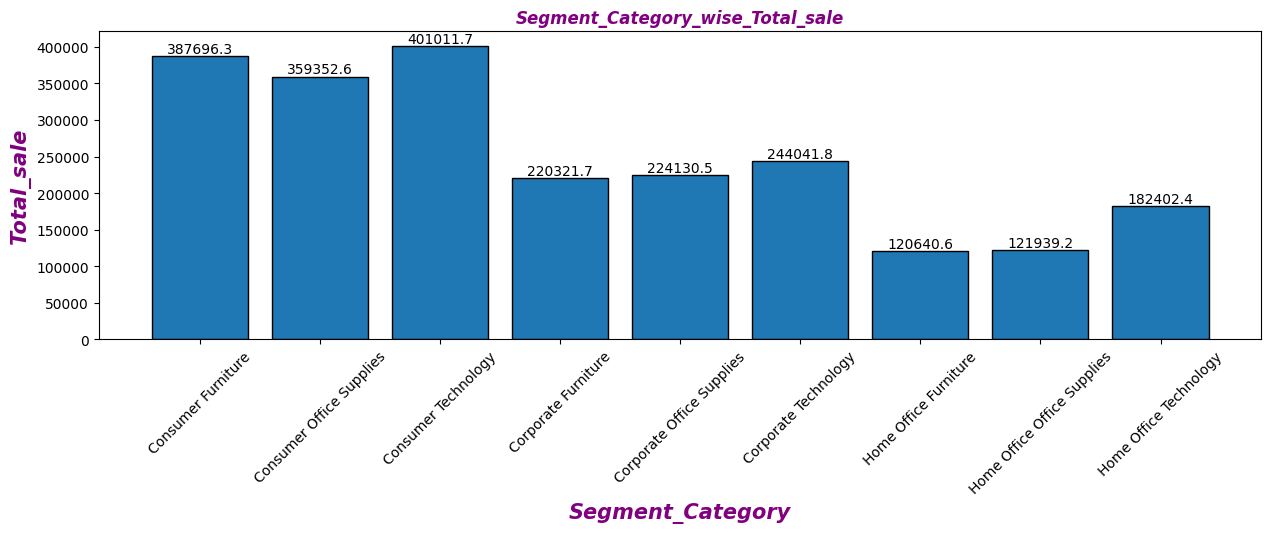

In [19]:
plt.figure(figsize=(15,4))
barplot = plt.bar(x=seg1_df['Segment_category'],height=seg1_df['total_sale'],edgecolor='black')
plt.bar_label(barplot,labels=seg1_df['Rounded_Total_sale'])
plt.title('Segment_Category_wise_Total_sale',color='purple',weight='bold',style='italic')
plt.xlabel('Segment_Category',color='purple',weight='bold',style='italic',size=15)
plt.ylabel('Total_sale',color='purple',weight='bold',style='italic',size=15)
plt.xticks(rotation=45)
plt.show()

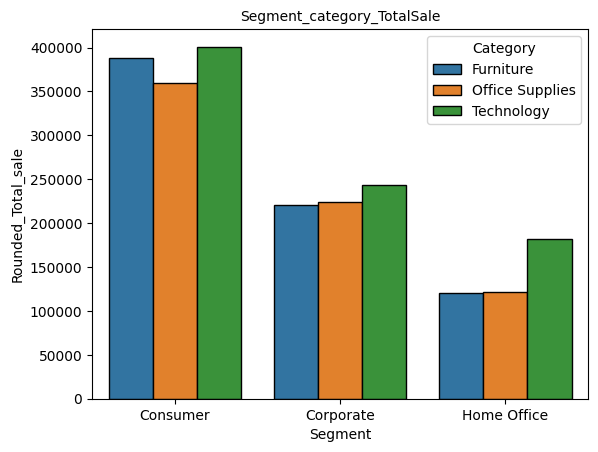

In [20]:
sns.barplot(data=seg1_df,x='Segment',y='Rounded_Total_sale',hue='Category',edgecolor='black')
plt.title('Segment_category_TotalSale',fontsize=10)
plt.show()

In [21]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,CA-2017-152156,2017-11-08,11/11/2017,2017-11-11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96


### CityWise Count

In [22]:
city_df = df['City'].value_counts().reset_index().head(10)
city_df

,City,count
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,221
8,San Diego,170
9,Springfield,161


### Plotting Bargraph 'Citywise_count'

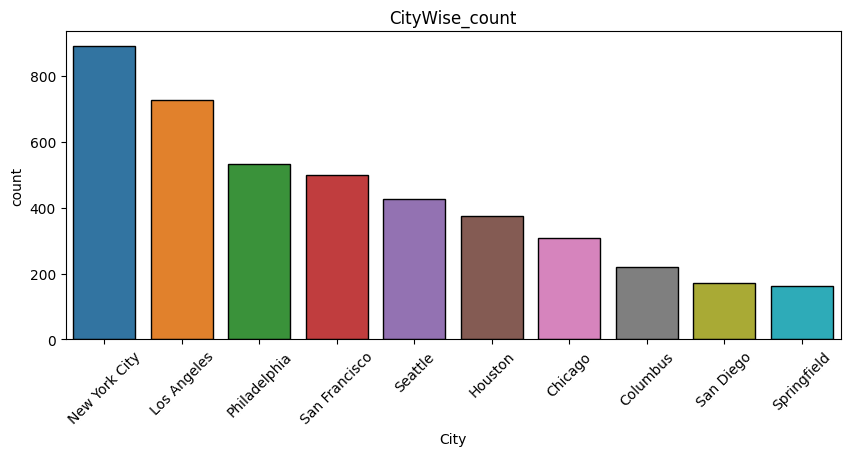

In [23]:
plt.figure(figsize=(10,4))
sns.barplot(data=city_df,x='City',y='count',edgecolor='black')
plt.title('CityWise_count')
plt.xticks(rotation=45)
plt.show()

In [24]:
city_cate_df = df.groupby(['City','Category']).agg(
    total_sale = ('Sales','sum')
).reset_index()
city_cate_df

,City,Category,total_sale
0,Aberdeen,Office Supplies,25.500
1,Abilene,Office Supplies,1.392
2,Akron,Furniture,433.596
3,Akron,Office Supplies,1107.646
4,Akron,Technology,1183.002
...,...,...,...
1181,York,Furniture,422.058
1182,York,Office Supplies,395.920
1183,Yucaipa,Office Supplies,50.800
1184,Yuma,Office Supplies,55.352


In [25]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,CA-2017-152156,2017-11-08,11/11/2017,2017-11-11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96


### State Wise Sales

In [26]:
st_df = df.groupby(['State']).agg(
    Total_sale=('Sales','sum')
).sort_values(by='Total_sale',ascending=False).reset_index().head(10)
st_df['Total_sale'] = st_df['Total_sale'].round(2)
st_df

,State,Total_sale
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,75130.35
9,Virginia,70636.72


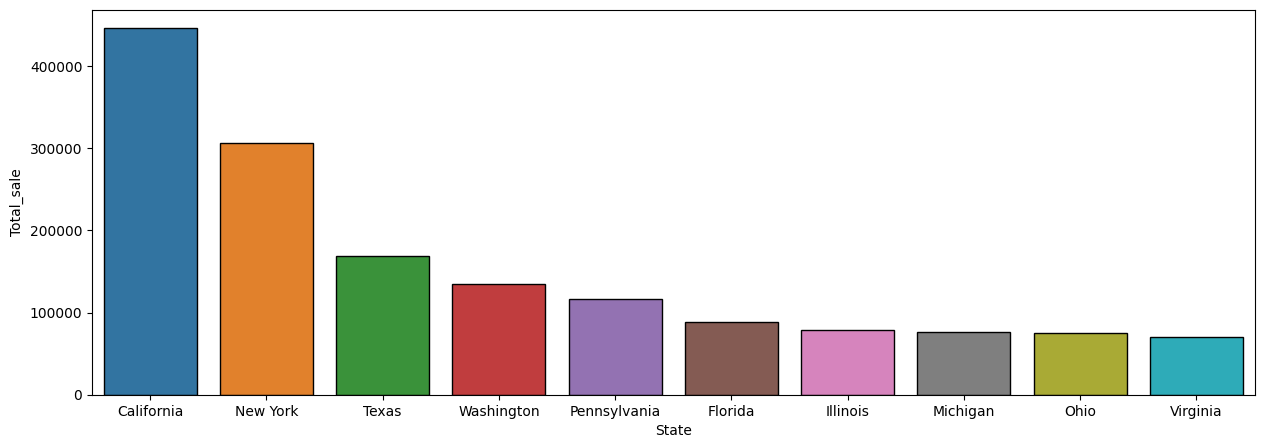

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(data=st_df,x='State',y='Total_sale',edgecolor='black')
plt.show()

### Plotting Pie chart

In [28]:
st_df.head(1)

,State,Total_sale
0,California,446306.46


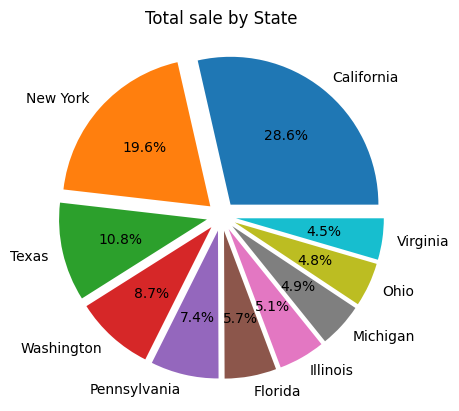

In [29]:
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(st_df['Total_sale'],labels=st_df['State'],autopct='%.1f%%',radius=1,textprops={'fontsize':10},explode=explode)
plt.title('Total sale by State')
plt.show()

In [30]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,CA-2017-152156,2017-11-08,11/11/2017,2017-11-11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96


### Grouping column Category & sub category

In [31]:
sub_df = df.groupby(['Category','Sub-Category']).agg(
    total_sale=('Sales','sum')
).reset_index()
sub_df['total_sale'] = sub_df['total_sale'].round(1)
sub_df

,Category,Sub-Category,total_sale
0,Furniture,Bookcases,113813.2
1,Furniture,Chairs,322822.7
2,Furniture,Furnishings,89212.0
3,Furniture,Tables,202810.6
4,Office Supplies,Appliances,104618.4
5,Office Supplies,Art,26705.4
6,Office Supplies,Binders,200028.8
7,Office Supplies,Envelopes,16128.0
8,Office Supplies,Fasteners,3002.0
9,Office Supplies,Labels,12347.7


### Creating new column cat-Sub_Category

In [32]:
sub_df['cat-sub_category'] = sub_df['Category'] + ' ' + sub_df['Sub-Category']
sub_df

,Category,Sub-Category,total_sale,cat-sub_category
0,Furniture,Bookcases,113813.2,Furniture Bookcases
1,Furniture,Chairs,322822.7,Furniture Chairs
2,Furniture,Furnishings,89212.0,Furniture Furnishings
3,Furniture,Tables,202810.6,Furniture Tables
4,Office Supplies,Appliances,104618.4,Office Supplies Appliances
5,Office Supplies,Art,26705.4,Office Supplies Art
6,Office Supplies,Binders,200028.8,Office Supplies Binders
7,Office Supplies,Envelopes,16128.0,Office Supplies Envelopes
8,Office Supplies,Fasteners,3002.0,Office Supplies Fasteners
9,Office Supplies,Labels,12347.7,Office Supplies Labels


### Plotting Bargraph

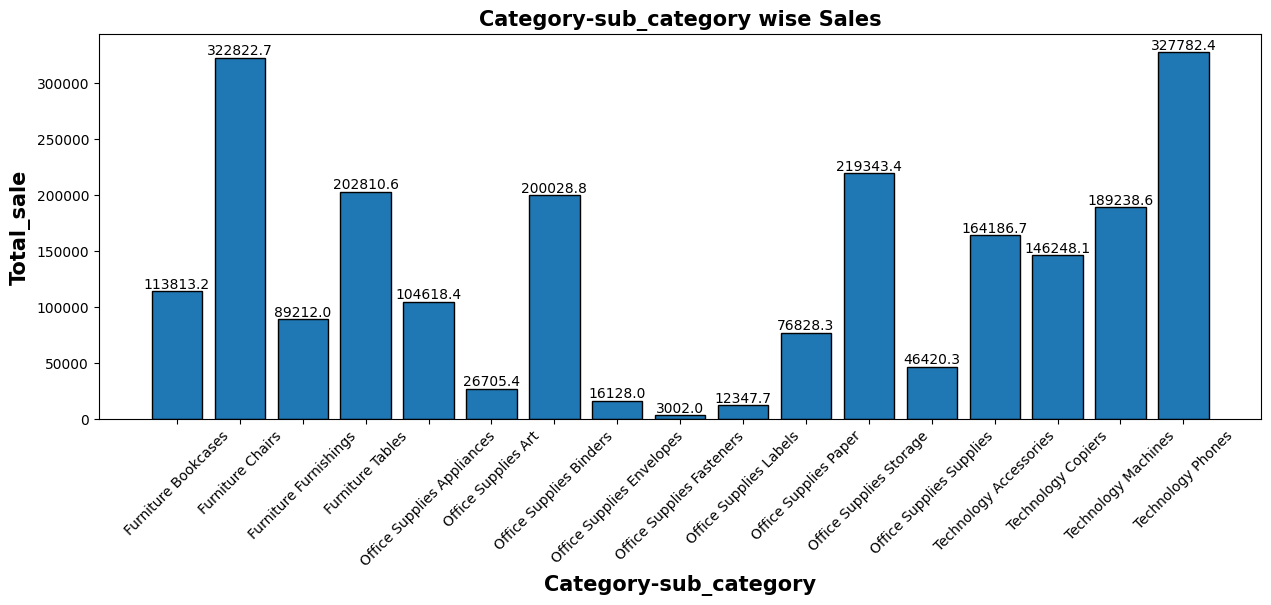

In [33]:
plt.figure(figsize=(15,5))
plt.bar(sub_df['cat-sub_category'],sub_df['total_sale'],edgecolor='black')
for i ,total_sale in enumerate(sub_df['total_sale']):
    plt.text(sub_df['cat-sub_category'][i],total_sale,str(total_sale),ha='center',va='bottom')
    
plt.xticks(rotation=45)
plt.title('Category-sub_category wise Sales',color='black',style='normal',weight='bold',size=15)
plt.xlabel('Category-sub_category',color='black',style='normal',weight='bold',size=15)
plt.ylabel('Total_sale',color='black',style='normal',weight='bold',size=15)
plt.show()

In [34]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,CA-2017-152156,2017-11-08,11/11/2017,2017-11-11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96


In [35]:
reg_df = df.groupby(['Region']).agg(
    total_sale = ('Sales','sum')
).reset_index()
reg_df['total_sale'] = reg_df['total_sale'].round(1)
reg_df

,Region,total_sale
0,Central,492646.9
1,East,669518.7
2,South,389151.5
3,West,710219.7


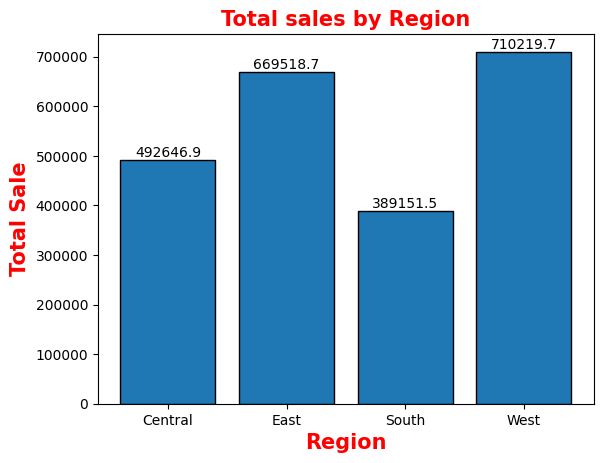

In [36]:
plt.bar(reg_df['Region'],reg_df['total_sale'],edgecolor='black')
for i ,total_sale in enumerate(reg_df['total_sale']):
    plt.text(reg_df['Region'][i],total_sale,str(total_sale),ha='center',va='bottom')
plt.title('Total sales by Region',color='red',weight='bold',size=15)
plt.xlabel('Region',color='red',weight='bold',size=15)
plt.ylabel('Total Sale',color='red',weight='bold',size=15)
plt.show()

### Plotting Pie Chart

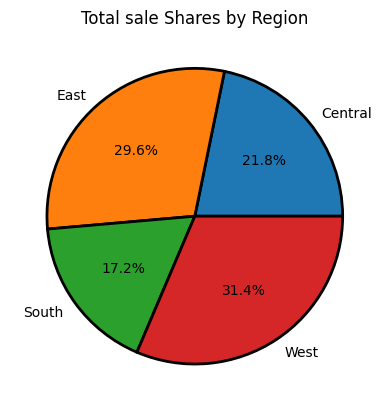

In [37]:
plt.pie(reg_df['total_sale'],labels=reg_df['Region'],radius=1,autopct='%.1f%%',
wedgeprops={'edgecolor':'black',
            'linewidth':2,})
            
plt.title('Total sale Shares by Region')
plt.show()

### Creating new column 'Year','Month','Monthname'

In [38]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,CA-2017-152156,2017-11-08,11/11/2017,2017-11-11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96


In [43]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

df['Monthname'] = df['Order Date'].dt.month_name()
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Year,Month,Monthname
0,CA-2017-152156,2017-11-08,11/11/2017,2017-11-11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2017,11,November


### Finding Yearly Sales

In [47]:
y_df = df.groupby(['Year']).agg(
    total_sales=('Sales','sum')
).reset_index()
y_df['total_sales'] = y_df['total_sales'].round(1)
y_df

,Year,total_sales
0,2015,479856.2
1,2016,459436.0
2,2017,600192.6
3,2018,722052.0


### Plotting Bar graph 

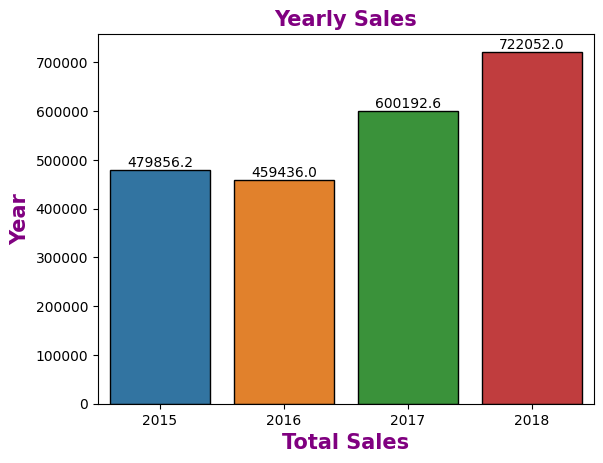

In [69]:
year = np.arange(2015,2019)
sns.barplot(data=y_df,x='Year',y='total_sales',edgecolor='black')
for i,total_sales in enumerate(y_df['total_sales']):
    plt.text(x=i,y=total_sales,s=str(total_sales),ha='center',va='bottom')
plt.xlabel('year')
plt.title('Yearly Sales',color='purple',size=15,weight='bold')
plt.xlabel('Total Sales',color='purple',size=15,weight='bold')
plt.ylabel('Year',color='purple',size=15,weight='bold')
plt.show()

In [71]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Year,Month,Monthname
0,CA-2017-152156,2017-11-08,11/11/2017,2017-11-11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2017,11,November


### Finding Monthly Sales

In [79]:
m_df = df.groupby('Monthname').agg(
    total_sale=('Sales','sum')
).reset_index()
m_df['total_sale'] = m_df['total_sale'].round(1)
m_df= m_df.sort_values(by='total_sale',ascending=False)
m_df

,Monthname,total_sale
9,November,350161.7
2,December,321480.2
11,September,300103.4
10,October,199496.3
7,March,197573.6
1,August,157315.9
8,May,154086.7
6,June,145837.5
5,July,145535.7
0,April,136283.0


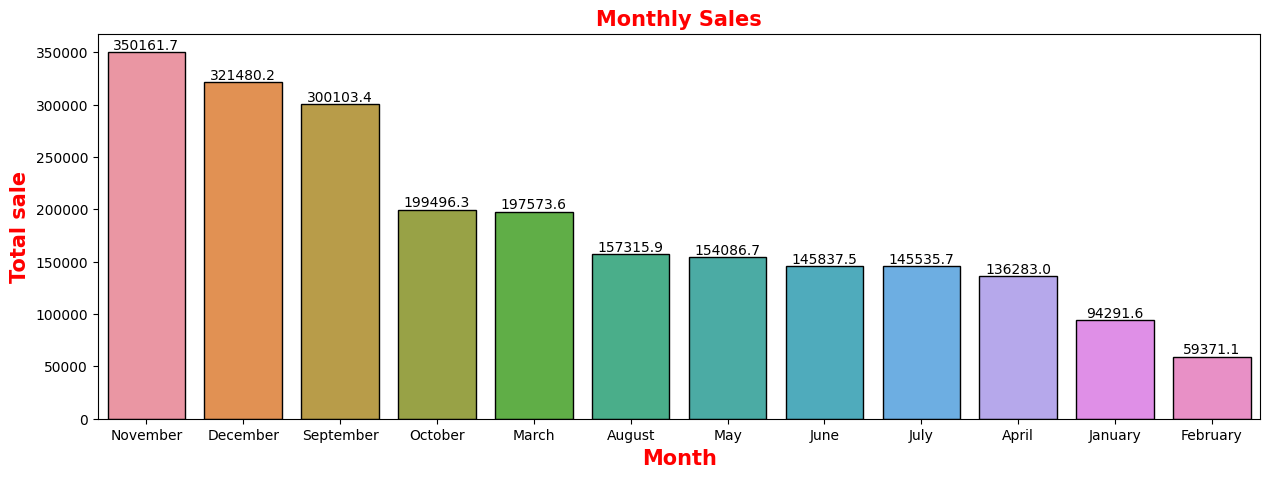

In [82]:
plt.figure(figsize=(15,5))
sns.barplot(data=m_df,x='Monthname',y='total_sale',edgecolor='black')
for i,total_sale in enumerate(m_df['total_sale']):
    plt.text(x=i,y=total_sale,s=str(total_sale),ha='center',va='bottom')
plt.title('Monthly Sales',color='red',weight='bold',size='15')
plt.xlabel('Month',color='red',weight='bold',size='15')
plt.ylabel('Total sale',color='red',weight='bold',size='15')
plt.show()

In [83]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Year,Month,Monthname
0,CA-2017-152156,2017-11-08,11/11/2017,2017-11-11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2017,11,November
